# Activation Functions and their derivatives
[Reference blog](https://medium.com/@omkar.nallagoni/activation-functions-with-derivative-and-python-code-sigmoid-vs-tanh-vs-relu-44d23915c1f4)

```{figure} ../images/artificial_neuron.gif
:alt: Atifical Neuron Animation
:class: bg-primary mb-1
:width: 400px
```
Image Credit [https://www.mql5.com/en/blogs/post/724245]

## Sigmoid Function

$$t = f(z) = \frac{1}{1+e^{-z}}$$
$$\frac{dt}{dz} = \frac{e^{-z}}{(1+e^{-z})^2}t*(1-t) $$

### In Plain Python with Numpy


C:\Users\wei\AppData\Local\Temp/ipykernel_3424/4051736159.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


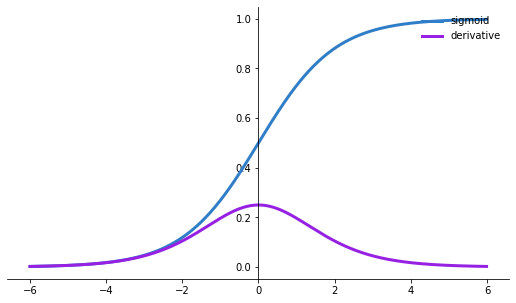

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
x=np.arange(-6,6,0.01)
sigmoid(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoid(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

### In Pytorch with `torch.sigmoid()`

```{warning}
`torch.range` is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end). Do not use:
  `x = torch.range(-6,6,0.01)`

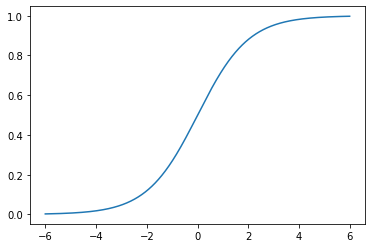

In [4]:
import torch
import numpy
import matplotlib.pyplot as plt

x = torch.arange(-6,6,0.01)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

[AUTOGRAD] (https://pytorch.org/tutorials/beginner/former_torchies/autograd_tutorial.html) is a core Torch package for automatic differentiation. 

tensor([-5.9900, -5.9800, -5.9700, -5.9600, -5.9500, -5.9400, -5.9300, -5.9200,
        -5.9100], grad_fn=<SliceBackward>)


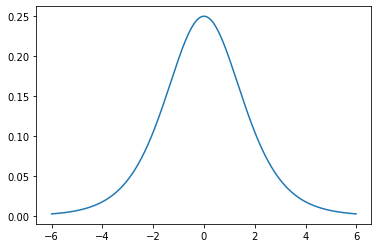

In [6]:
x = torch.arange(-6,6,0.01)
x.requires_grad_()
print(x[1:10]) 
t = torch.sigmoid(x)

t.backward(torch.ones(x.shape))

# x.grad the gradient at each x with respect to function t
dt = x.grad 
plt.plot(x.detach().numpy(), dt.detach().numpy())
plt.show()


In [27]:
x

tensor([-6.0000, -5.9900, -5.9800,  ...,  5.9700,  5.9800,  5.9900],
       requires_grad=True)

## Hyperbolic tanh

$$t = tanh(z) = \frac{e^z-e^{-z}}{e^z-e^{-z}}$$
$$\frac{dt}{dz} = 1 - t^2$$



### In Plain Python and Numpy

C:\Users\wei\AppData\Local\Temp/ipykernel_3424/3684840425.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


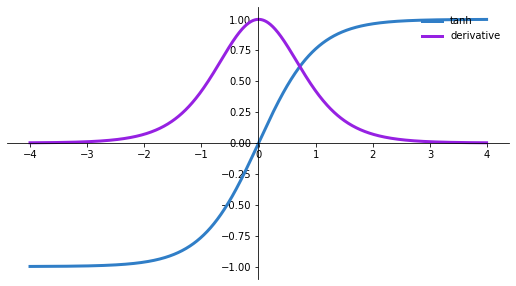

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

   
z=np.arange(-4,4,0.01)
# print(tanh(z)[0])
tanh(z)[0].size,tanh(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,tanh(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

### In Pytorch with `torch.tanh()`

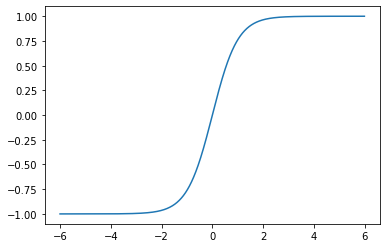

In [9]:
import torch
import matplotlib.pyplot as pyplot

x = torch.arange(-6, 6, 0.01)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()


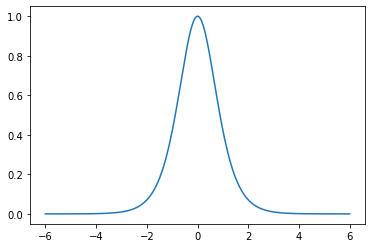

In [10]:
x = torch.arange(-6,6,0.01)
x.requires_grad_() 
y = torch.tanh(x)

y.backward(torch.ones(x.shape))

plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.show()

## Relu

$$ t = f(z) = max(0, z)$$
$$
  \frac{dt}{dz} =
    \begin{cases}
      1 & \text{if $z\geq 0$}\\
      0 & \text{otherwise}\\
    \end{cases}       
$$

```

C:\Users\wei\AppData\Local\Temp/ipykernel_3424/1351231205.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


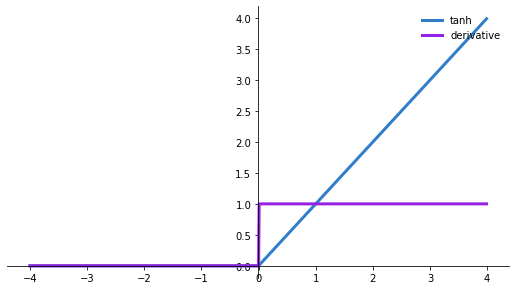

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    t = [v if v >= 0 else 0 for v in x]
    dt = [1 if v >= 0 else 0 for v in x] 
    t = np.array(t) 
    dt = np.array(dt)
    return t,dt

z=np.arange(-4,4,0.01)
#print(relu(z)[0])
relu(z)[0].size,relu(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,relu(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,relu(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

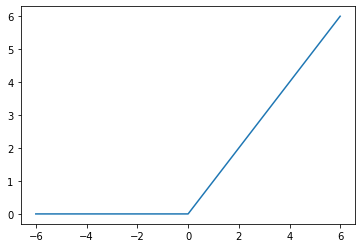

In [13]:
import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.arange(-6, 6, 0.01)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

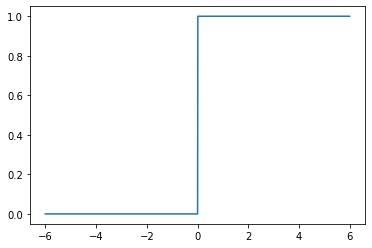

In [18]:

x = torch.arange(-6,6,0.01)
x.requires_grad_() 
# y = torch.nn.ReLU not working
y = torch.nn.functional.relu(x)

y.backward(torch.ones(x.shape))

plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.show()

## Parametric and Leaky Relu

```{admonition} Dying ReLU
The clipping effect of ReLU that helps with the vanishing gradient problem can also become an issue. Over time, certain ouputs in the network can simply vecome zero and never revive again. The is called the *dying ReLU* problem. 
```
The Prametric ReLU (PReLU) is introduced to address the dying ReLU, where the leak coefficient $a$ is a learned parameter. 

$$
  t = max(z, a*z) = f(a,z)
    \begin{cases}
      z & \text{if $z\geq 0$}\\
      a*z & \text{otherwise}\\
    \end{cases} 
$$
$$          
  \frac{dt}{dz} =
    \begin{cases}
      1 & \text{if $z\geq 0$}\\
      a & \text{otherwise}\\
    \end{cases}       
$$

<ipython-input-12-42168a7efe00>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


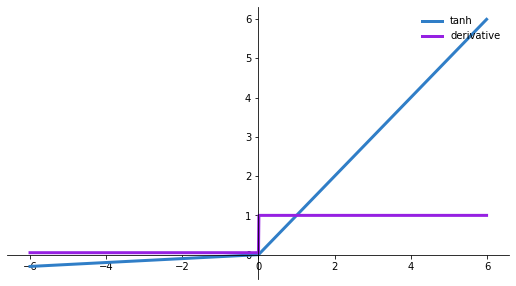

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def parametric_relu(a, x):
    t = [v if v >= 0 else a*v for v in x]
    dt = [1 if v >= 0 else a for v in x] 
    t = np.array(t) 
    dt = np.array(dt)
    return t,dt

z=np.arange(-6,6,0.01)
#print(relu(z)[0])
t=parametric_relu(0.05,z)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,t[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,t[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

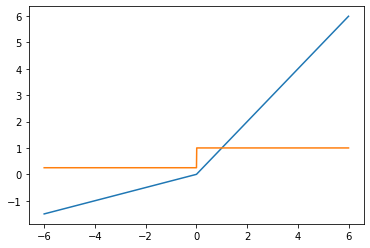

In [26]:
import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-6, 6, 0.01)
x.requires_grad_() 
y = prelu(x)
y.backward(torch.ones(x.shape))
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.show()

## Softmax

The softmax function squahses the output of each unit to be between 0 and 1, like sigmod function. However, the softmax operation also divides each output by the sum of all outputs, which gives a discrete probabilty distribution over $k$ possible classes. 

$$ softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}}$$

In [14]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[1.4162, 0.9940, 1.4615]])
tensor([[0.3701, 0.2426, 0.3872]])
tensor([1.])


For more, [see this blog on Activation Functions in Neural Networks](https://medium.com/@kshitijkhurana3010/activation-functions-in-neural-networks-ed88c56b611b).